In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import BernoulliRBM
from sklearn import metrics

# Description of Dataset - Facial Keypoints Detection
Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are missing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

# Description of Training Set File
list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.

In [2]:
df_raw = pd.read_csv('FacialKeypointsTraining.csv')

In [3]:
df_raw.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
df_raw.shape

(7049, 31)

In [5]:
df_raw.dropna(inplace=True)

In [6]:
df_raw.shape

(2140, 31)

In [7]:
df_raw.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [8]:
df_raw.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [9]:
def GetListOfIntegers(pixels):
    pixels=list(pixels.split())
    for i in range(len(pixels)):
        pixels[i] = int(pixels[i])
    return pixels

In [10]:
df_raw['Image'] = df_raw['Image'].apply(GetListOfIntegers)

In [11]:
df_raw['Image'].head()

0    [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1    [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
2    [144, 142, 159, 180, 188, 188, 184, 180, 167, ...
3    [193, 192, 193, 194, 194, 194, 193, 192, 168, ...
4    [147, 148, 160, 196, 215, 214, 216, 217, 219, ...
Name: Image, dtype: object

In [12]:
image_array=np.array(df_raw['Image'].tolist())

In [13]:
image_array.shape

(2140, 9216)

In [14]:
df_target = df_raw[['left_eye_center_x']]

In [15]:
train_features = image_array[:1700,:]
train_target = df_target.loc[:1700,:]
test_features = image_array[1700:,:]
test_target = df_target.loc[1700:,:]

In [16]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.001, batch_size=100, n_iter=50)
rbm.fit(train_features)


BernoulliRBM(batch_size=100, learning_rate=0.001, n_components=100, n_iter=50,
       random_state=None, verbose=0)

In [17]:
rbm.components_

array([[  1.20696370e+02,   1.14873701e+02,   1.08591401e+02, ...,
          1.05977926e+02,   1.07584924e+02,   1.08678685e+02],
       [  1.50427456e-02,  -6.20631401e-03,  -6.71821041e-04, ...,
          1.67914611e-02,   7.88960575e-03,   5.45126791e-03],
       [  1.20658839e+02,   1.14809095e+02,   1.08546155e+02, ...,
          1.05968475e+02,   1.07579773e+02,   1.08641150e+02],
       ..., 
       [  1.20692624e+02,   1.14841257e+02,   1.08584395e+02, ...,
          1.05982267e+02,   1.07583588e+02,   1.08662046e+02],
       [  1.20557691e+02,   1.14718602e+02,   1.08458873e+02, ...,
          1.05891871e+02,   1.07484258e+02,   1.08551592e+02],
       [  1.20599476e+02,   1.14759440e+02,   1.08476882e+02, ...,
          1.05891291e+02,   1.07462530e+02,   1.08577452e+02]])

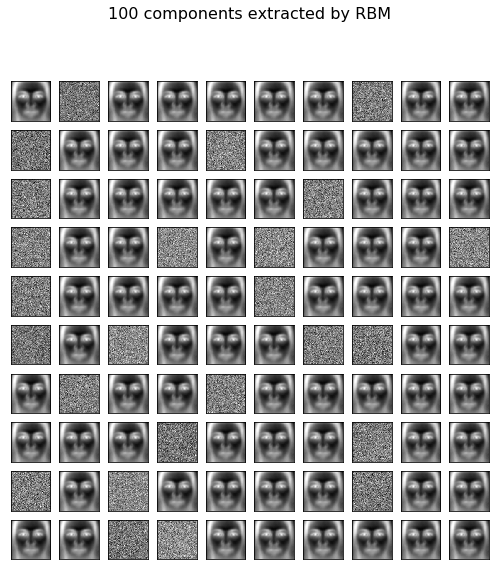

In [19]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((96, 96)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(rbm.n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [20]:
# Version 2
rbm = BernoulliRBM(n_components=64, learning_rate=0.001, batch_size=200, n_iter=25)
rbm.fit(train_features)

BernoulliRBM(batch_size=200, learning_rate=0.001, n_components=64, n_iter=25,
       random_state=None, verbose=0)

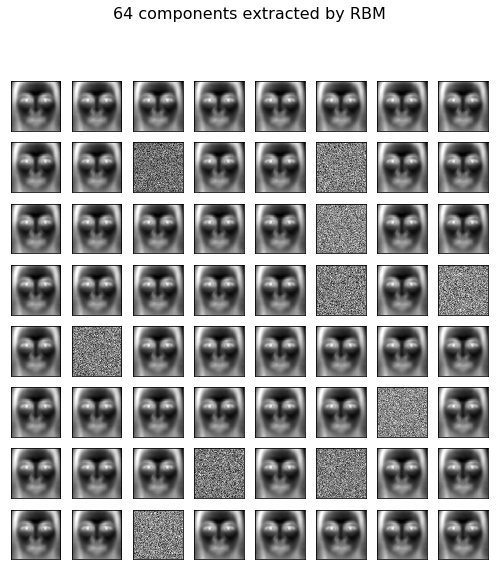

In [21]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((96, 96)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(rbm.n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [22]:
# Version 3
rbm = BernoulliRBM(n_components=64, learning_rate=0.001, batch_size=400, n_iter=25)
rbm.fit(train_features)

BernoulliRBM(batch_size=400, learning_rate=0.001, n_components=64, n_iter=25,
       random_state=None, verbose=0)

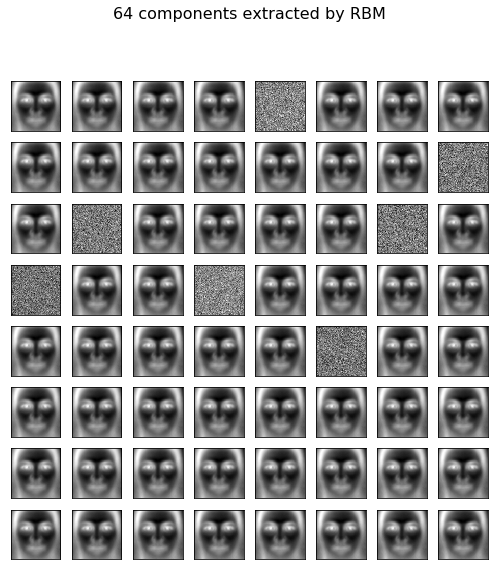

In [23]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((96, 96)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(rbm.n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [24]:
# Version 4
rbm = BernoulliRBM(n_components=16, learning_rate=0.001, batch_size=25, n_iter=25)
rbm.fit(train_features)

BernoulliRBM(batch_size=25, learning_rate=0.001, n_components=16, n_iter=25,
       random_state=None, verbose=0)

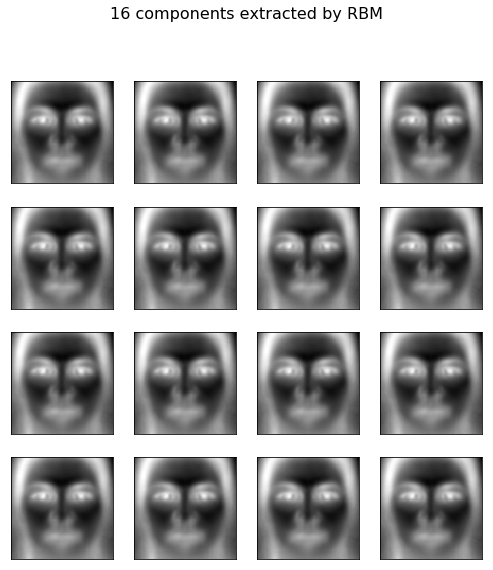

In [26]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(4, 4, i + 1)
    plt.imshow(comp.reshape((96, 96)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(rbm.n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()